In [41]:
import numpy as np 
import pandas as pd

In [119]:
df = pd.read_csv('books.csv')
df.head()

,count,year,language
0,1,2010,en
1,2,2010,nl
2,3,2010,nl
3,4,2010,nl
4,5,2010,nl


In [43]:
languages = {'nl':'Dutch', 'en':'English', 'fr':'French'}
df = df.replace(languages)
df.head()

,count,year,language
0,1,2010,English
1,2,2010,Dutch
2,3,2010,Dutch
3,4,2010,Dutch
4,5,2010,Dutch


In [44]:
order_languages = ['Dutch', 'English', 'French']
df['language'] = df.language.astype('category', ordered=True, categories=order_languages)
df.language.dtype

CategoricalDtype(categories=['Dutch', 'English', 'French'], ordered=True)

In [55]:
df_peryear_andcountry = df.groupby(['year', 'language'])['count'].count()
print(df_peryear_andcountry)

year  language
2010  Dutch       10
      English      3
2011  Dutch        8
      English      5
2012  Dutch       10
      English      7
      French       1
2013  Dutch       16
      English      8
      French       3
2014  Dutch        6
      English      6
2015  Dutch       10
      English      4
      French       8
2016  Dutch       10
      English      9
      French       7
2017  Dutch       10
      English      4
      French       8
2018  Dutch        2
      English      5
      French       3
2019  Dutch       15
      English     10
      French       3
Name: count, dtype: int64


In [120]:
df_plotable = df_peryear_andcountry.unstack(level=1, fill_value=0)
df_plotable

language,Dutch,English,French
year,,,
2010,10,3,0
2011,8,5,0
2012,10,7,1
2013,16,8,3
2014,6,6,0
2015,10,4,8
2016,10,9,7
2017,10,4,8
2018,2,5,3


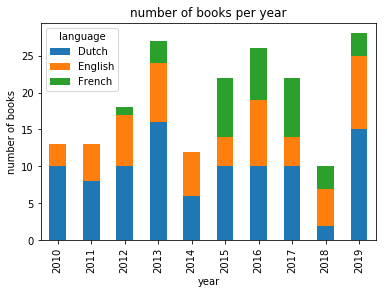

In [110]:
import matplotlib.pyplot as plt
df_plotable.plot(kind='bar', stacked=True)
plt.ylabel('number of books')
plt.title('number of books per year')
plt.show()

In [121]:
total_per_year = df_plotable.sum(axis=1)
total_per_year_cummulative = total_per_year.cumsum()
total_per_year_cummulative

year
2010     13
2011     26
2012     44
2013     71
2014     83
2015    105
2016    131
2017    153
2018    163
2019    191
dtype: int64

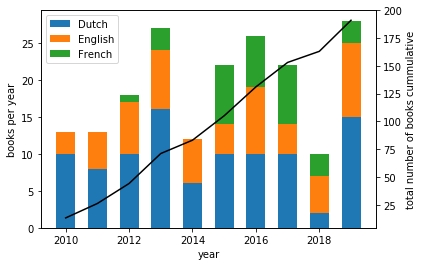

In [159]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('year')
ax1.set_ylabel('books per year')
ax1.bar(df_plotable.index, df_plotable.Dutch, width=0.6, label='Dutch')
ax1.bar(df_plotable.index, df_plotable.English, width=0.6, label='English', bottom=df_plotable.Dutch)
ax1.bar(df_plotable.index, df_plotable.French, width=0.6, label='French', bottom=df_plotable.English+df_plotable.Dutch)

ax1.legend()

ax2 = ax1.twinx()

ax2.set_ylabel('total number of books cummulative')
ax2.plot(total_per_year_cummulative, color='black')

# fig.tight_layout()
plt.show()